In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [7]:
train_CSV = "/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"
df = pd.read_csv(train_CSV)

In [8]:
train_image = "/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

# **Exploratory Data Analysis(EDA)**

In [9]:
print(df.head)

<bound method NDFrame.head of          IMAGE MEDICINE_NAME            GENERIC_NAME
0        0.png         Aceta             Paracetamol
1        1.png         Aceta             Paracetamol
2        2.png         Aceta             Paracetamol
3        3.png         Aceta             Paracetamol
4        4.png         Aceta             Paracetamol
...        ...           ...                     ...
3115  3115.png       Zithrin  Azithromycin Dihydrate
3116  3116.png       Zithrin  Azithromycin Dihydrate
3117  3117.png       Zithrin  Azithromycin Dihydrate
3118  3118.png       Zithrin  Azithromycin Dihydrate
3119  3119.png       Zithrin  Azithromycin Dihydrate

[3120 rows x 3 columns]>


In [10]:
print(df["MEDICINE_NAME"].unique())

['Aceta' 'Ace' 'Alatrol' 'Amodis' 'Atrizin' 'Axodin' 'Azithrocin' 'Azyth'
 'Az' 'Bacaid' 'Backtone' 'Baclofen' 'Baclon' 'Bacmax' 'Beklo' 'Bicozin'
 'Canazole' 'Candinil' 'Cetisoft' 'Conaz' 'Dancel' 'Denixil' 'Diflu'
 'Dinafex' 'Disopan' 'Esonix' 'Esoral' 'Etizin' 'Exium' 'Fenadin'
 'Fexofast' 'Fexo' 'Filmet' 'Fixal' 'Flamyd' 'Flexibac' 'Flexilax'
 'Flugal' 'Ketocon' 'Ketoral' 'Ketotab' 'Ketozol' 'Leptic' 'Lucan-R'
 'Lumona' 'M-Kast' 'Maxima' 'Maxpro' 'Metro' 'Metsina' 'Monas' 'Montair'
 'Montene' 'Montex' 'Napa Extend' 'Napa' 'Nexcap' 'Nexum' 'Nidazyl'
 'Nizoder' 'Odmon' 'Omastin' 'Opton' 'Progut' 'Provair' 'Renova' 'Rhinil'
 'Ritch' 'Rivotril' 'Romycin' 'Rozith' 'Sergel' 'Tamen' 'Telfast'
 'Tridosil' 'Trilock' 'Vifas' 'Zithrin']


<ipython-input-11-131c6ad874ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


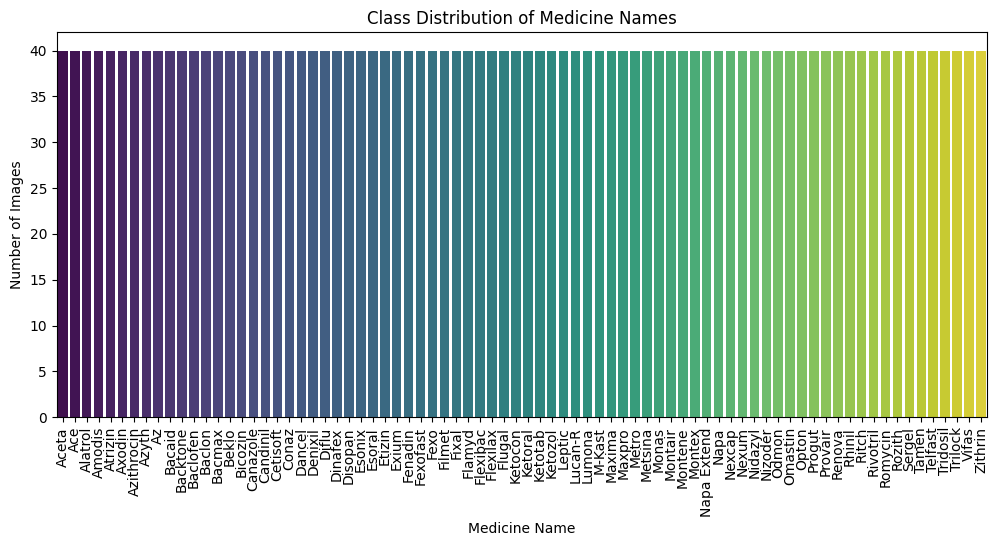

In [11]:
class_counts = df["MEDICINE_NAME"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Class Distribution of Medicine Names")
plt.xlabel("Medicine Name")
plt.ylabel("Number of Images")
plt.show()

In [12]:
img=cv2.imread("/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Training/training_words/0.png")

In [13]:
img.shape

(92, 238, 3)

In [14]:
img1=cv2.imread("/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Training/training_words/1.png")

In [15]:
img1.shape

(84, 207, 3)

In [16]:
def show_sample_images(df, train_image, num_samples=5):
    sample_data = df.sample(num_samples)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, (idx, row) in enumerate(sample_data.iterrows()):
        img_path = os.path.join(train_image, row["IMAGE"])

        # Check if the image exists
        if not os.path.exists(img_path):
            print(f" Image not found: {img_path}")
            continue

        img = cv2.imread(img_path)

        if img is None:
            print(f" Failed to load: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(row["MEDICINE_NAME"])
        axes[i].axis("off")

    plt.show()




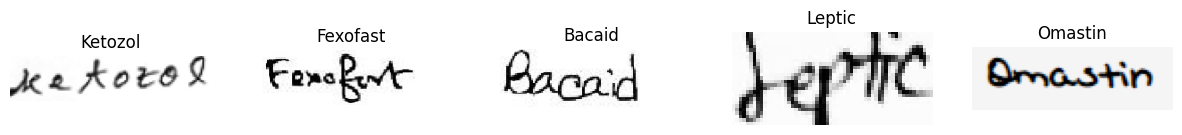

In [17]:
show_sample_images(df, train_image)


# **PRE-PROCESSING**

In [18]:
train_output_folder = "/content/train_preprocessed_images"
os.makedirs(train_output_folder, exist_ok=True)

In [19]:
validation_output_folder = "/content/valdiation_preprocessed_images"
os.makedirs(validation_output_folder, exist_ok=True)

In [20]:
test_output_folder = "/content/test_preprocessed_images"
os.makedirs(test_output_folder, exist_ok=True)

In [21]:
def show_image(title, img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

In [22]:
def preprocess_and_save_images(input_folder,output_folder, target_size=(128, 128)):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(input_folder, image_file)
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error loading image: {image_file}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        resized = cv2.resize(gray, target_size)

        _, binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        save_path = os.path.join(output_folder, image_file)
        cv2.imwrite(save_path, binary)

        if i < 1:
            show_image(f"Processed: {image_file}", binary)

    print(f"Processed {len(image_files)} images and saved to {output_folder}")

In [23]:
train_input_folder = "/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

In [24]:
validation_input_folder = "/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words"

In [25]:
test_input_folder = "/content/drive/MyDrive/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words"

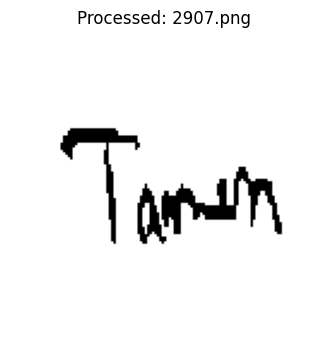

Processed 3120 images and saved to /content/train_preprocessed_images


In [26]:
preprocess_and_save_images(train_input_folder,train_output_folder)

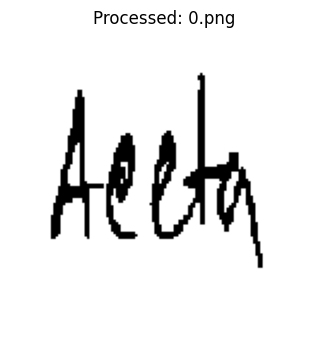

Processed 780 images and saved to /content/valdiation_preprocessed_images


In [27]:
preprocess_and_save_images(validation_input_folder,validation_output_folder)

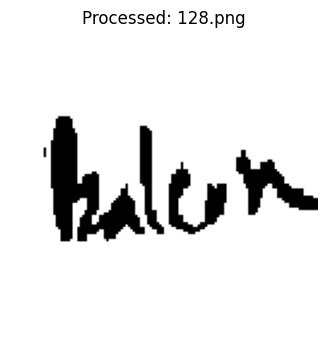

Processed 800 images and saved to /content/test_preprocessed_images


In [28]:
preprocess_and_save_images(test_input_folder,test_output_folder)